In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Goal 
* Prediction of death
* Metric R2 = % 90 
* There is no missing value 

In [11]:
## Exploratory Data Analysis (EDA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [25]:
# Defining Numerical Variables 
df_numerical = data[['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine','time']]

In [23]:
# Defining Categorical Variables 
df_categorical = data[['anaemia', 'ejection_fraction', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

In [26]:
#Uniqueness control 
data.ejection_fraction.unique()
data.serum_sodium.unique()


array([130, 136, 129, 137, 116, 132, 131, 138, 133, 140, 127, 121, 135,
       134, 144, 128, 145, 142, 139, 146, 141, 143, 126, 124, 113, 125,
       148])

In [27]:
# displays statistical summary of numerical variables 
df_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [28]:
# missing value analysis 
print('Checking missing data:')
data.isnull().any()


Checking missing data:


age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

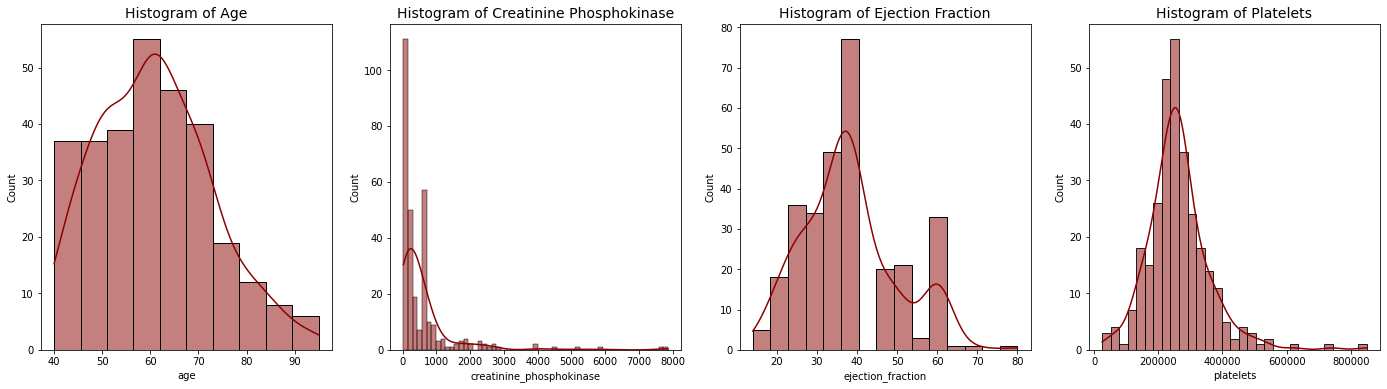

In [30]:
# Histogram visualization of numerical features

f, axes = plt.subplots(ncols=4, figsize=(24, 6))

sns.histplot(x='age', color='darkred', kde=True, data=data,ax=axes[0])
axes[0].set_title('Histogram of Age', fontsize = 14)

sns.histplot(x='creatinine_phosphokinase', color='darkred', kde=True, data=data,ax=axes[1])
axes[1].set_title('Histogram of Creatinine Phosphokinase', fontsize = 14)

sns.histplot(x='ejection_fraction', color='darkred', kde=True, data=data,ax=axes[2])
axes[2].set_title('Histogram of Ejection Fraction', fontsize = 14)

sns.histplot(x='platelets', color='darkred', kde=True, data=data,ax=axes[3])
axes[3].set_title('Histogram of Platelets', fontsize = 14)

plt.show()

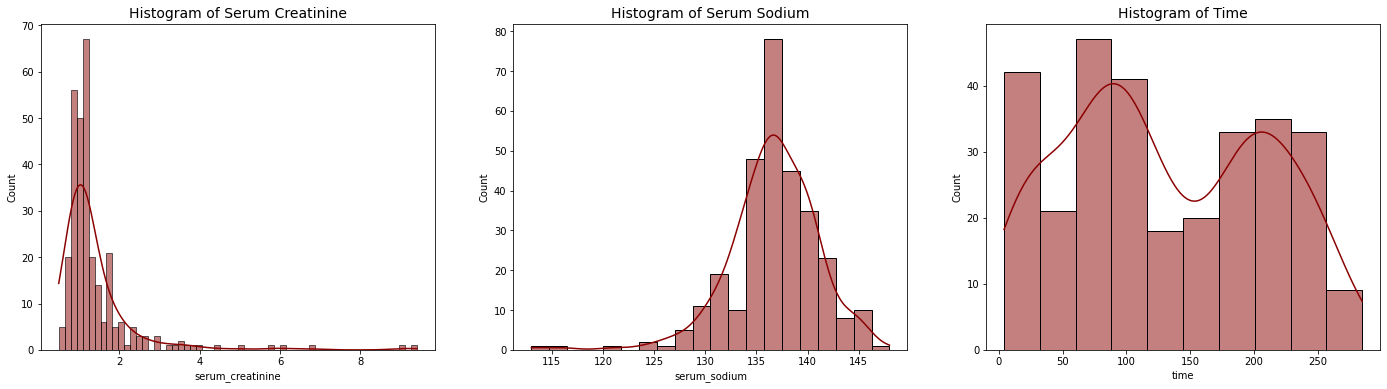

In [32]:
# Histogram visualization of numerical feature

f, axes = plt.subplots(ncols=3, figsize=(24, 6))

sns.histplot(x='serum_creatinine', color='darkred', kde=True, data=data,ax=axes[0])
axes[0].set_title('Histogram of Serum Creatinine', fontsize = 14)

sns.histplot(x='serum_sodium', color='darkred', kde=True, data=data,ax=axes[1])
axes[1].set_title('Histogram of Serum Sodium', fontsize = 14)

sns.histplot(x='time', color='darkred', kde=True, data=data,ax=axes[2])
axes[2].set_title('Histogram of Time', fontsize = 14)

plt.show()

In [35]:
# outlier detection
from sklearn.ensemble import IsolationForest

In [36]:
Out= IsolationForest()